# Project: Investopedia

Investors make educated guesses by analyzing data. They'll read the news, study the company history, industry trends and other lots of data points that go into making a prediction. The prevailing theories is that stock prices are totally random and unpredictable but that raises the question why top firms like Morgan Stanley and Goldman Sachs quantitative analysts to build predictive models.

I have tried building one such model here. This project utilizes Deep Learning models, Long-Short Term Memory (LSTM) Neural Network algorithm, to predict stock prices. For data with timeframes recurrent neural networks (RNNs) come in handy but recent researches have shown that LSTM, networks are the most popular and useful variants of RNNs.

I have used stock price data(2012-2017) of Facebook, Google, Microsoft, Apple and Amazon for this. I have taken this data from Yahoo! Finance

## Download the data
Function for getting the data for a company

In [2]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.datetime(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]),0,0).timestamp()
    end = datetime.datetime(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]),0,0).timestamp()
    url_string = "https://query1.finance.yahoo.com/v7/finance/download/{0}".format(symbol)
    url_string += "?period1={0}&period2={1}&interval=1d&&events=history&includeAdjustedClose=true".format(int(start),int(end))

    col_names = ['Date','Open','High','Low','Close','Adj Close','Volume']
    stocks = pd.read_csv(url_string, header=0,error_bad_lines=False,engine='python',names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

Download data of Facebook, Google, Microsoft, Apple and Amazon from 25th dec 2012 to 25th dec 2017

In [4]:
data = get_historical_data("GOOGL","2012-12-25","2017-12-25") 
data1 = get_historical_data("AMZN","2012-12-25","2017-12-25") 
data2 = get_historical_data("FB","2012-12-25","2017-12-25") 
data3 = get_historical_data("MSFT","2012-12-25","2017-12-25") 
data4 = get_historical_data("AAPL","2012-12-25","2017-12-25") 

Create a csv file of the downloaded data

In [5]:
data.to_csv('google.csv',index = False)
data1.to_csv('amazon.csv',index = False)
data2.to_csv('facebook.csv',index = False)
data3.to_csv('microsoft.csv',index = False)
data4.to_csv('apple.csv',index = False)

## Normalizing and Preprocessing the data

## reading the data

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
data1 = pd.read_csv('amazon.csv')
data2 = pd.read_csv('facebook.csv')
data3 = pd.read_csv('microsoft.csv')
data4 = pd.read_csv('apple.csv')

print(data.head())
print(data1.head())
print(data2.head())
print(data3.head())
print(data4.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2012-12-24  357.612610  357.947937  354.089081  355.105103  355.105103   
1  2012-12-26  354.389404  356.796783  351.556549  354.789795  354.789795   
2  2012-12-27  353.923920  354.774780  349.654663  353.498505  353.498505   
3  2012-12-28  351.196198  353.808807  350.355347  350.355347  350.355347   
4  2012-12-31  350.350342  355.640656  348.348358  354.044037  354.044037   

    Volume  
0  1680100  
1  2362400  
2  3291500  
3  2801100  
4  3990800  
         Date        Open        High         Low       Close   Adj Close  \
0  2012-12-24  257.299988  259.500000  256.959991  258.619995  258.619995   
1  2012-12-26  257.149994  257.420013  248.039993  248.630005  248.630005   
2  2012-12-27  248.279999  249.350006  242.860001  248.309998  248.309998   
3  2012-12-28  245.850006  247.440002  245.050003  245.179993  245.179993   
4  2012-12-31  243.750000  252.410004  242.750000  250.869995  250.869995 

## Functions for normalizing the data and removing unwanted columns

In [7]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data


def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i_counter])
        close.append(data['Close'][i_counter])
        volume.append(data['Volume'][i_counter])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    # return new formatted data
    return stocks

In [9]:
stocks = remove_data(data)
stocks1 = remove_data(data1)
stocks2 = remove_data(data2)
stocks3 = remove_data(data3)
stocks4 = remove_data(data4)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())
print(stocks1.head())
print("---")
print(stocks1.tail())
print(stocks2.head())
print("---")
print(stocks2.tail())
print(stocks3.head())
print("---")
print(stocks3.tail())
print(stocks4.head())
print("---")
print(stocks4.tail())

   Item        Open       Close   Volume
0     0  357.612610  355.105103  1680100
1     1  354.389404  354.789795  2362400
2     2  353.923920  353.498505  3291500
3     3  351.196198  350.355347  2801100
4     4  350.350342  354.044037  3990800
---
      Item         Open        Close   Volume
1255  1255  1076.449951  1085.089966  1514600
1256  1256  1083.020020  1079.780029  1317500
1257  1257  1080.920044  1073.560059  1436400
1258  1258  1075.390015  1070.849976  1282000
1259  1259  1070.000000  1068.859985   889400
   Item        Open       Close   Volume
0     0  257.299988  258.619995   984400
1     1  257.149994  248.630005  4152700
2     2  248.279999  248.309998  3639300
3     3  245.850006  245.179993  1858700
4     4  243.750000  250.869995  3419000
---
      Item         Open        Close   Volume
1255  1255  1187.369995  1190.579956  2947600
1256  1256  1189.150024  1187.380005  2587800
1257  1257  1190.500000  1177.619995  2371200
1258  1258  1175.900024  1174.760010  21

## Functions for plotting graphs

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)


def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basic(stocks, title, y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()


def plot_prediction(actual, prediction, title, y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title, y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

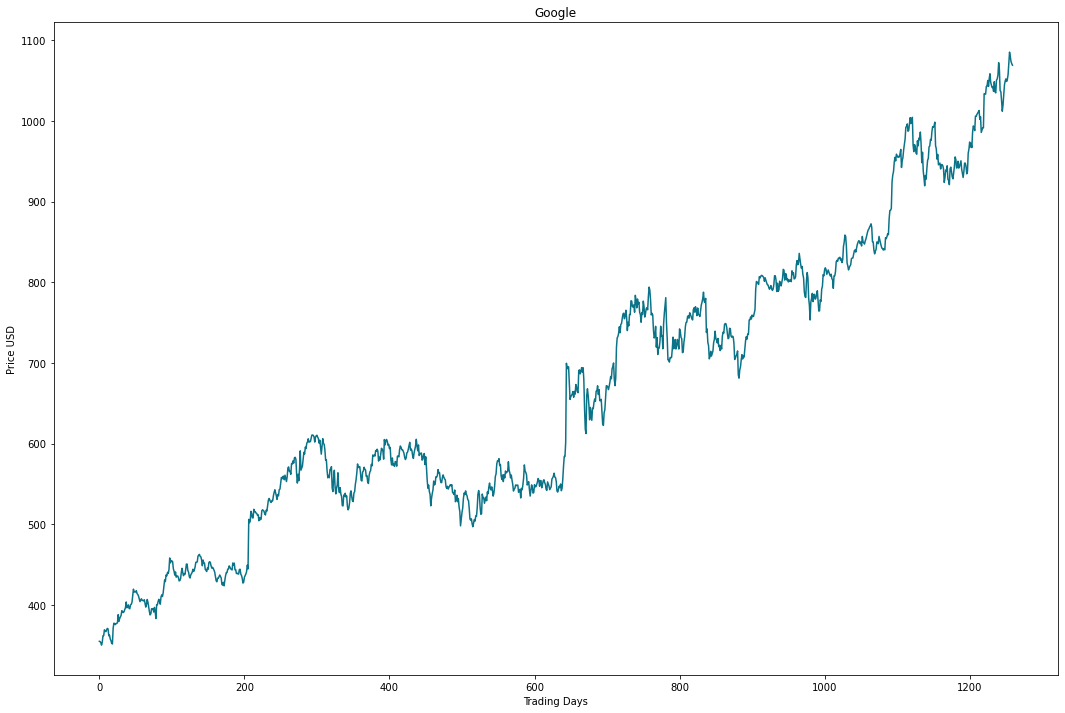

In [17]:
plot_basic(stocks,"Google")

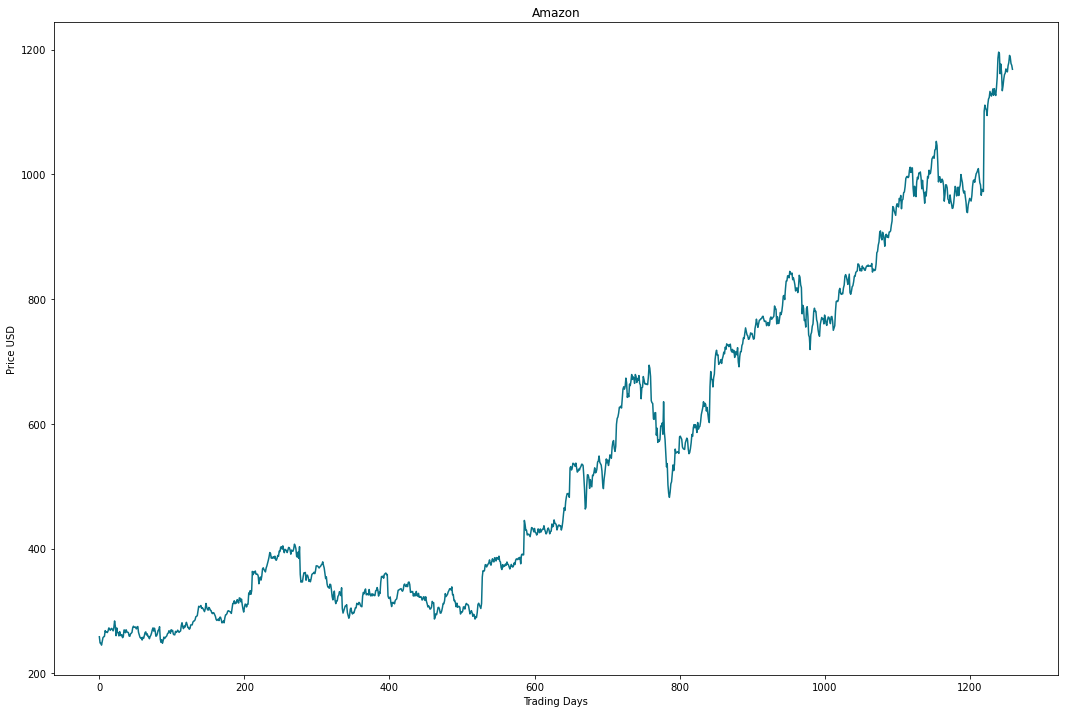

In [18]:
plot_basic(stocks1,"Amazon")

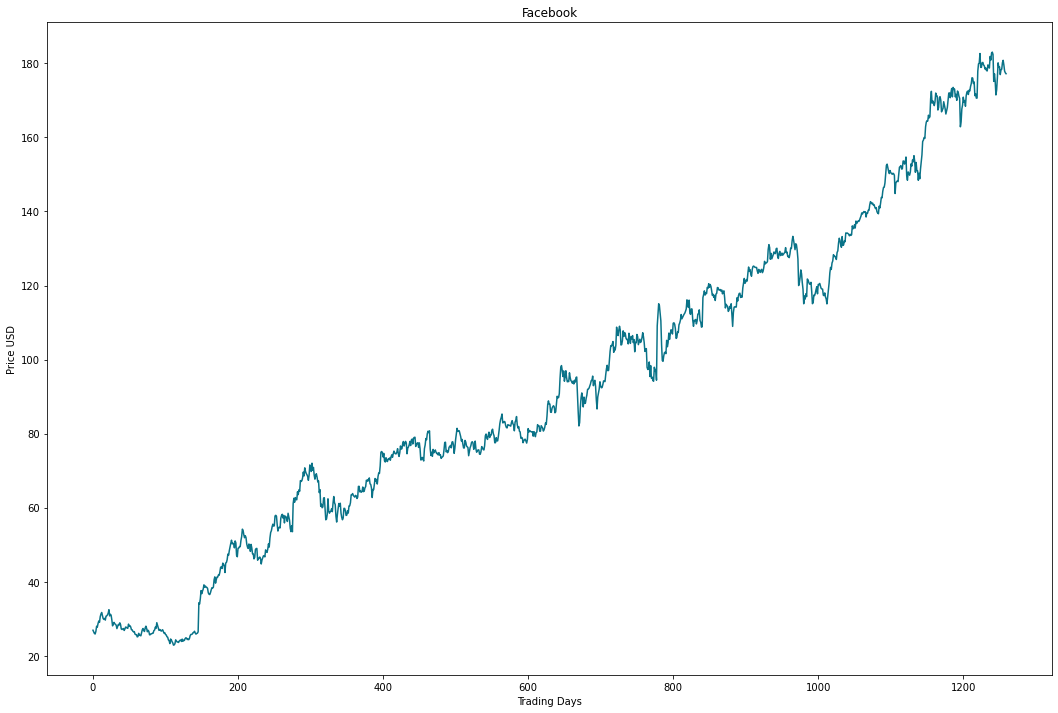

In [19]:
plot_basic(stocks2,"Facebook")

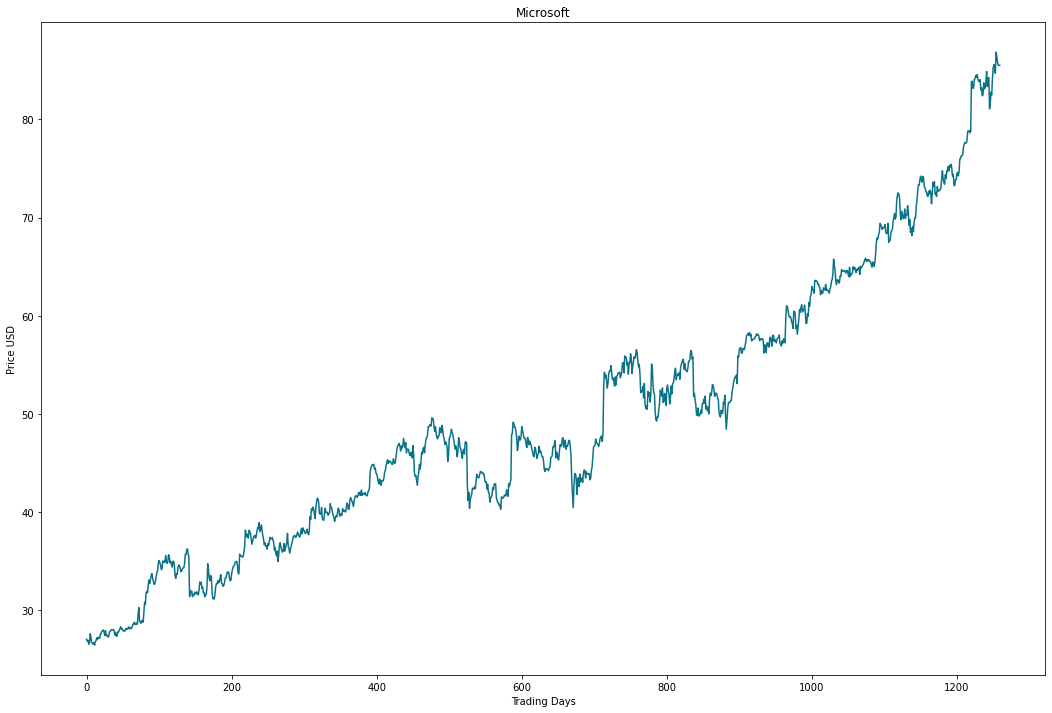

In [20]:
plot_basic(stocks3,"Microsoft")

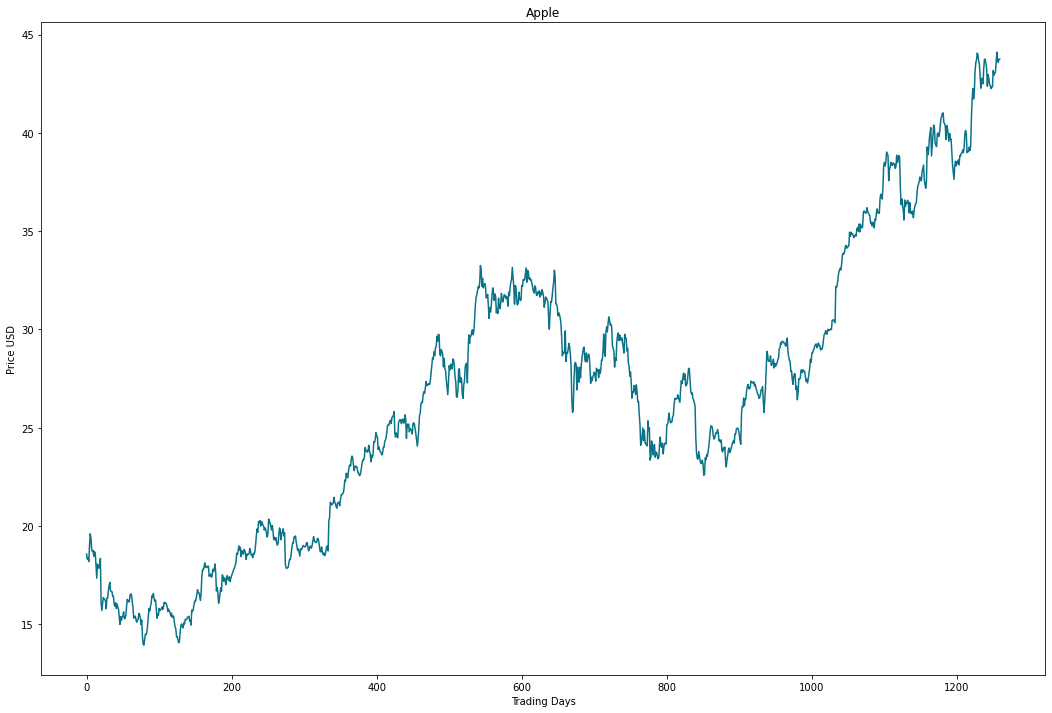

In [21]:
plot_basic(stocks4,"Apple")

In [23]:
stocks = get_normalised_data(stocks)
print("Google")
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

Google
   Item      Open     Close    Volume
0     0  0.009912  0.006465  0.051330
1     1  0.005513  0.006035  0.081535
2     2  0.004877  0.004278  0.122666
3     3  0.001154  0.000000  0.100956
4     4  0.000000  0.005020  0.153623


Open   --- mean : 0.42830228250272495   	 Std:  0.24623148765290118   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.42691950833150955   	 Std:  0.245636133722837   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.08874163010933121   	 Std:  0.07287911599020741   	 Max:  1.0   	 Min:  0.0


In [24]:
stocks1 = get_normalised_data(stocks1)
print("Amazon")
print(stocks1.head())

print("\n")
print("Open   --- mean :", np.mean(stocks1['Open']),  "  \t Std: ", np.std(stocks1['Open']),  "  \t Max: ", np.max(stocks1['Open']),  "  \t Min: ", np.min(stocks1['Open']))
print("Close  --- mean :", np.mean(stocks1['Close']), "  \t Std: ", np.std(stocks1['Close']), "  \t Max: ", np.max(stocks1['Close']), "  \t Min: ", np.min(stocks1['Close']))
print("Volume --- mean :", np.mean(stocks1['Volume']),"  \t Std: ", np.std(stocks1['Volume']),"  \t Max: ", np.max(stocks1['Volume']),"  \t Min: ", np.min(stocks1['Volume']))

Amazon
   Item      Open     Close    Volume
0     0  0.014098  0.014138  0.000000
1     1  0.013942  0.003629  0.138525
2     2  0.004713  0.003292  0.116078
3     3  0.002185  0.000000  0.038226
4     4  0.000000  0.005985  0.106446


Open   --- mean : 0.320555862106507   	 Std:  0.2724485786280761   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.32250086575015946   	 Std:  0.2752951061149534   	 Max:  0.9999999999999998   	 Min:  0.0
Volume --- mean : 0.11870369572267553   	 Std:  0.09385666251395909   	 Max:  1.0   	 Min:  0.0


In [25]:
stocks2 = get_normalised_data(stocks2)
print("Facebook")
print(stocks2.head())

print("\n")
print("Open   --- mean :", np.mean(stocks2['Open']),  "  \t Std: ", np.std(stocks2['Open']),  "  \t Max: ", np.max(stocks2['Open']),  "  \t Min: ", np.min(stocks2['Open']))
print("Close  --- mean :", np.mean(stocks2['Close']), "  \t Std: ", np.std(stocks2['Close']), "  \t Max: ", np.max(stocks2['Close']), "  \t Min: ", np.min(stocks2['Close']))
print("Volume --- mean :", np.mean(stocks2['Volume']),"  \t Std: ", np.std(stocks2['Volume']),"  \t Max: ", np.max(stocks2['Volume']),"  \t Min: ", np.min(stocks2['Volume']))

Facebook
   Item      Open     Close    Volume
0     0  0.021866  0.025167  0.062070
1     1  0.025168  0.022544  0.075824
2     2  0.022178  0.019672  0.104489
3     3  0.015512  0.018797  0.140905
4     4  0.019998  0.023231  0.151473


Open   --- mean : 0.4344503516252597   	 Std:  0.2663151220473062   	 Max:  1.0000000000000002   	 Min:  0.0
Close  --- mean : 0.4361724479395079   	 Std:  0.2670586736017308   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.08228872787577293   	 Std:  0.07711450020679496   	 Max:  0.9999999999999999   	 Min:  0.0


In [26]:
stocks3 = get_normalised_data(stocks3)
print("Microsoft")
print(stocks3.head())

print("\n")
print("Open   --- mean :", np.mean(stocks3['Open']),  "  \t Std: ", np.std(stocks3['Open']),  "  \t Max: ", np.max(stocks3['Open']),  "  \t Min: ", np.min(stocks3['Open']))
print("Close  --- mean :", np.mean(stocks3['Close']), "  \t Std: ", np.std(stocks3['Close']), "  \t Max: ", np.max(stocks3['Close']), "  \t Min: ", np.min(stocks3['Close']))
print("Volume --- mean :", np.mean(stocks3['Volume']),"  \t Std: ", np.std(stocks3['Volume']),"  \t Max: ", np.max(stocks3['Volume']),"  \t Min: ", np.min(stocks3['Volume']))

Microsoft
   Item      Open     Close    Volume
0     0  0.011710  0.009935  0.055671
1     1  0.008906  0.006624  0.100437
2     2  0.006597  0.008280  0.132647
3     3  0.003629  0.001490  0.086365
4     4  0.001649  0.004140  0.146570


Open   --- mean : 0.37988984197691955   	 Std:  0.23118960993365667   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.3824841154444521   	 Std:  0.23203914349771557   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.11168303961724706   	 Std:  0.0819090392851906   	 Max:  1.0   	 Min:  0.0


In [27]:
stocks4 = get_normalised_data(stocks4)
print("Apple")
print(stocks4.head())

print("\n")
print("Open   --- mean :", np.mean(stocks4['Open']),  "  \t Std: ", np.std(stocks4['Open']),  "  \t Max: ", np.max(stocks4['Open']),  "  \t Min: ", np.min(stocks4['Open']))
print("Close  --- mean :", np.mean(stocks4['Close']), "  \t Std: ", np.std(stocks4['Close']), "  \t Max: ", np.max(stocks4['Close']), "  \t Min: ", np.min(stocks4['Close']))
print("Volume --- mean :", np.mean(stocks4['Volume']),"  \t Std: ", np.std(stocks4['Volume']),"  \t Max: ", np.max(stocks4['Volume']),"  \t Min: ", np.min(stocks4['Volume']))

Apple
   Item      Open     Close    Volume
0     0  0.158009  0.153527  0.091770
1     1  0.156398  0.145036  0.181302
2     2  0.149881  0.147476  0.289210
3     3  0.146001  0.140998  0.217941
4     4  0.146288  0.167738  0.433647


Open   --- mean : 0.4277378856799963   	 Std:  0.24616303133185075   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.42144664440260066   	 Std:  0.2444041144424352   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.12790671373487938   	 Std:  0.10586399019715213   	 Max:  1.0   	 Min:  0.0


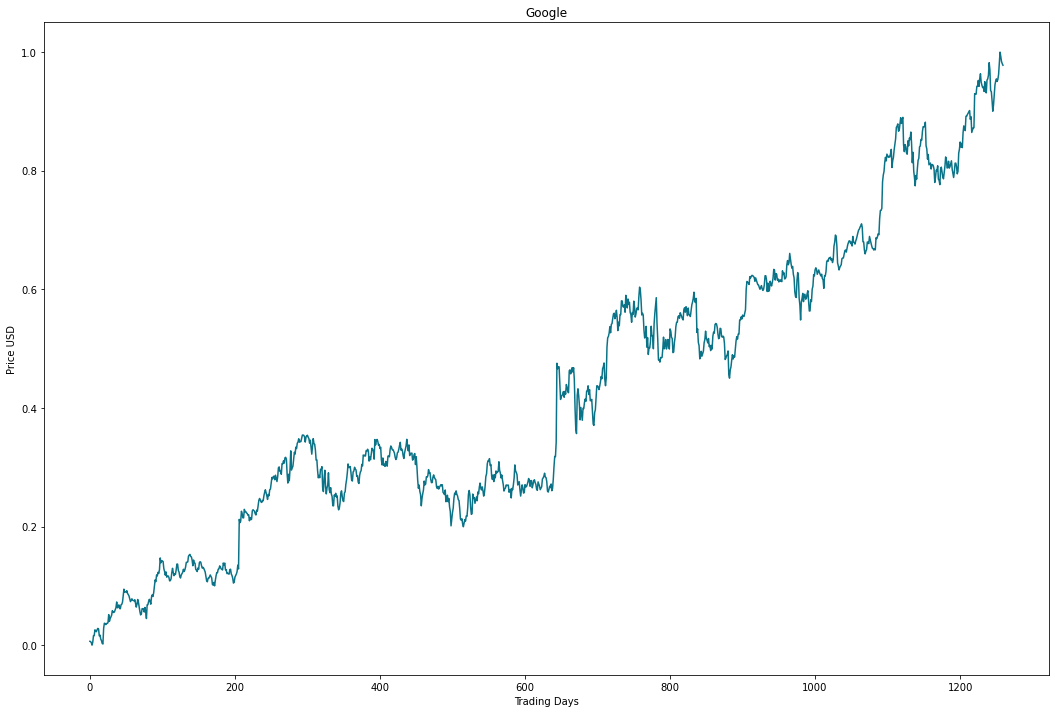

In [28]:
plot_basic(stocks,"Google")

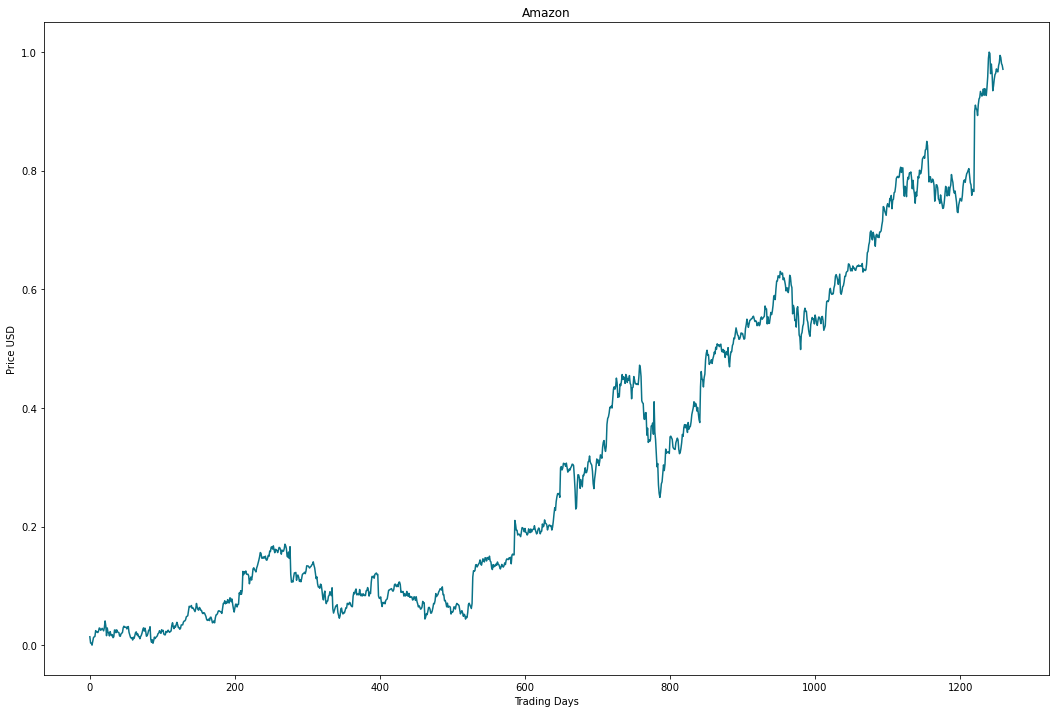

In [29]:
plot_basic(stocks1,"Amazon")

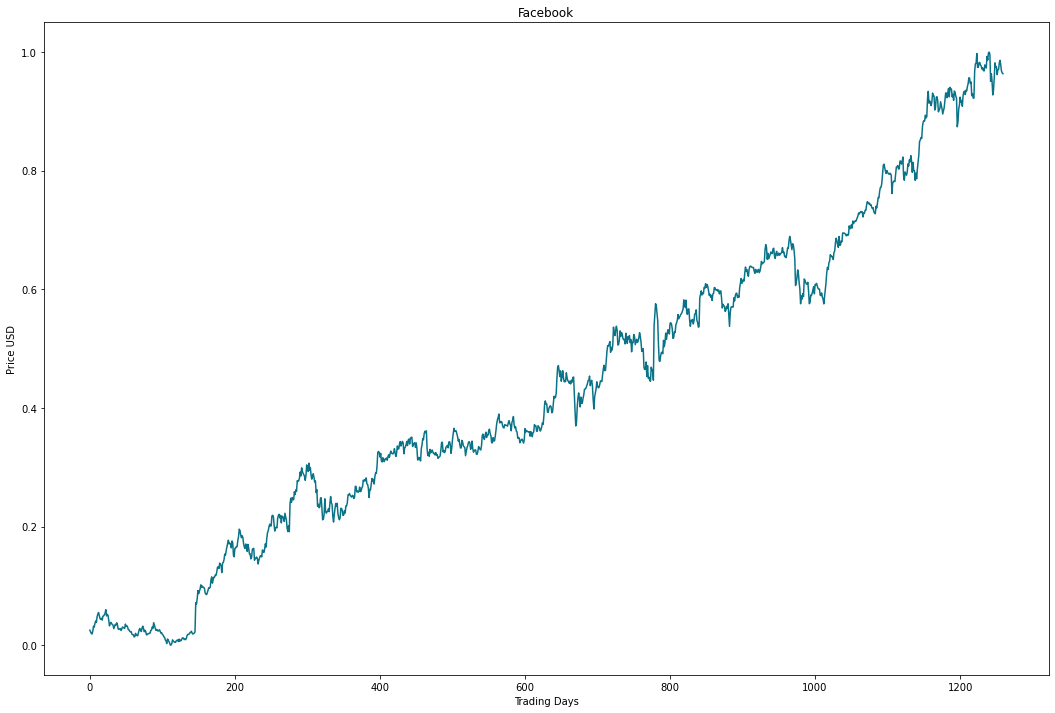

In [30]:
plot_basic(stocks2,"Facebook")

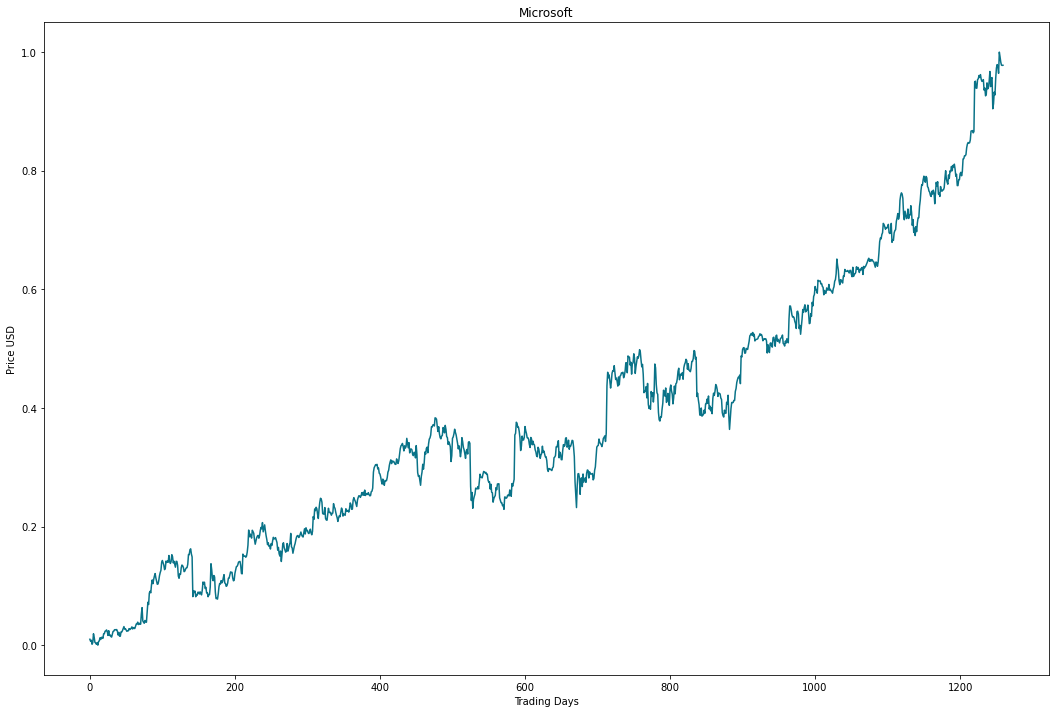

In [31]:
plot_basic(stocks3,"Microsoft")

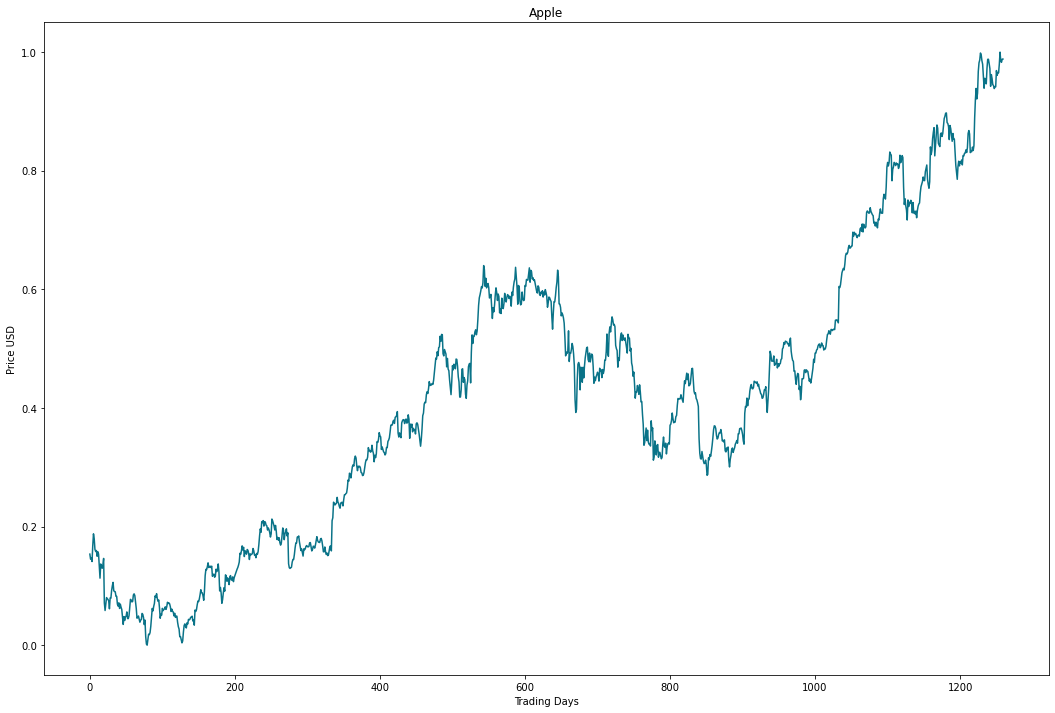

In [32]:
plot_basic(stocks4,"Apple")

In [34]:
stocks.to_csv('google_preprocessed.csv',index= False)
stocks1.to_csv('amazon_preprocessed.csv',index= False)
stocks2.to_csv('facebook_preprocessed.csv',index= False)
stocks3.to_csv('microsoft_preprocessed.csv',index= False)
stocks4.to_csv('apple_preprocessed.csv',index= False)

## Load the pre processed data

In [36]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

stocks = pd.read_csv('google_preprocessed.csv')
print("Google")
display(stocks.head())
stocks1 = pd.read_csv('amazon_preprocessed.csv')
print("Amazon")
display(stocks1.head())
stocks2 = pd.read_csv('facebook_preprocessed.csv')
print("Facebook")
display(stocks2.head())
stocks3 = pd.read_csv('microsoft_preprocessed.csv')
print("Microsoft")
display(stocks3.head())
stocks4 = pd.read_csv('apple_preprocessed.csv')
print("Apple")
display(stocks4.head())

Google


,Item,Open,Close,Volume
0,0,0.009912,0.006465,0.051330
1,1,0.005513,0.006035,0.081535
2,2,0.004877,0.004278,0.122666
3,3,0.001154,0.000000,0.100956
4,4,0.000000,0.005020,0.153623


Amazon


,Item,Open,Close,Volume
0,0,0.014098,0.014138,0.000000
1,1,0.013942,0.003629,0.138525
2,2,0.004713,0.003292,0.116078
3,3,0.002185,0.000000,0.038226
4,4,0.000000,0.005985,0.106446


Facebook


,Item,Open,Close,Volume
0,0,0.021866,0.025167,0.062070
1,1,0.025168,0.022544,0.075824
2,2,0.022178,0.019672,0.104489
3,3,0.015512,0.018797,0.140905
4,4,0.019998,0.023231,0.151473


Microsoft


,Item,Open,Close,Volume
0,0,0.011710,0.009935,0.055671
1,1,0.008906,0.006624,0.100437
2,2,0.006597,0.008280,0.132647
3,3,0.003629,0.001490,0.086365
4,4,0.001649,0.004140,0.146570


Apple


,Item,Open,Close,Volume
0,0,0.158009,0.153527,0.091770
1,1,0.156398,0.145036,0.181302
2,2,0.149881,0.147476,0.289210
3,3,0.146001,0.140998,0.217941
4,4,0.146288,0.167738,0.433647


## Functions for splitting the data into training and testing set

In [68]:
import numpy as np
import math


def scale_range(x, input_range, target_range):
    """
    Rescale a numpy array from input to target range
    :param x: data to scale
    :param input_range: optional input range for data: default 0.0:1.0
    :param target_range: optional target range for data: default 0.0:1.0
    :return: rescaled array, incoming range [min,max]
    """

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range


def train_test_split_linear_regression(stocks):
    """
        Split the data set into training and testing feature for Linear Regression Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
        :return: label_range: scaled range of label used in predicting price,
    """
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    for index, row in stocks.iterrows():
        # print([np.array(row['Item'])])
        feature.append([(row['Item'])])
        label.append([(row['Close'])])

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .315
    split = int(math.floor(len(stocks['Item']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range


def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
        Split the data set into training and testing feature for Long Short Term Memory Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :param prediction_time: no of days
        :param test_data_size: size of test data to be used
        :param unroll_length: how long a window should be used for train test split
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
    """
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].to_numpy()
    y_train = stocks[prediction_time:-test_data_cut]['Close'].to_numpy()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].to_numpy()
    y_test = stocks[prediction_time - test_data_cut:]['Close'].to_numpy()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

## Linear regression model

In [39]:
from sklearn import linear_model
import numpy as np


def build_model(X, y):
    """
    build a linear regression model using sklearn.linear_model
    :param X: Feature dataset
    :param y: label dataset
    :return: a linear regression model
    """
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod


def predict_prices(model, x, label_range):
    """
    Predict the label for given test sets
    :param model: a linear regression model
    :param x: testing features
    :param label_range: normalised range of label data
    :return: predicted labels for given features
    """
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()

## Split data into train and test pair

In [40]:
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(stocks)

print("Google")
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

X_train1, X_test1, y_train1, y_test1, label_range= train_test_split_linear_regression(stocks1)

print("Amazon")
print("x_train", X_train1.shape)
print("y_train", y_train1.shape)
print("x_test", X_test1.shape)
print("y_test", y_test1.shape)

X_train2, X_test2, y_train2, y_test2, label_range= train_test_split_linear_regression(stocks2)

print("Facebook")
print("x_train", X_train2.shape)
print("y_train", y_train2.shape)
print("x_test", X_test2.shape)
print("y_test", y_test2.shape)

X_train3, X_test3, y_train3, y_test3, label_range= train_test_split_linear_regression(stocks3)

print("Microsoft")
print("x_train", X_train3.shape)
print("y_train", y_train3.shape)
print("x_test", X_test3.shape)
print("y_test", y_test3.shape)

X_train4, X_test4, y_train4, y_test4, label_range= train_test_split_linear_regression(stocks4)

print("Apple")
print("x_train", X_train4.shape)
print("y_train", y_train4.shape)
print("x_test", X_test4.shape)
print("y_test", y_test4.shape)

Google
x_train (864, 1)
y_train (864, 1)
x_test (396, 1)
y_test (396, 1)
Amazon
x_train (864, 1)
y_train (864, 1)
x_test (396, 1)
y_test (396, 1)
Facebook
x_train (864, 1)
y_train (864, 1)
x_test (396, 1)
y_test (396, 1)
Microsoft
x_train (864, 1)
y_train (864, 1)
x_test (396, 1)
y_test (396, 1)
Apple
x_train (864, 1)
y_train (864, 1)
x_test (396, 1)
y_test (396, 1)


## Train a Linear regressor model on training set and get prediction

In [42]:
model = build_model(X_train,y_train)
model1 = build_model(X_train1,y_train1)
model2 = build_model(X_train2,y_train2)
model3 = build_model(X_train3,y_train3)
model4 = build_model(X_train4,y_train4)

##  Get prediction on test set

In [45]:
predictions = predict_prices(model,X_test, label_range)
predictions1 = predict_prices(model1,X_test1, label_range)
predictions2 = predict_prices(model2,X_test1, label_range)
predictions3 = predict_prices(model3,X_test1, label_range)
predictions4 = predict_prices(model4,X_test1, label_range)

## Plot the predicted values against actual


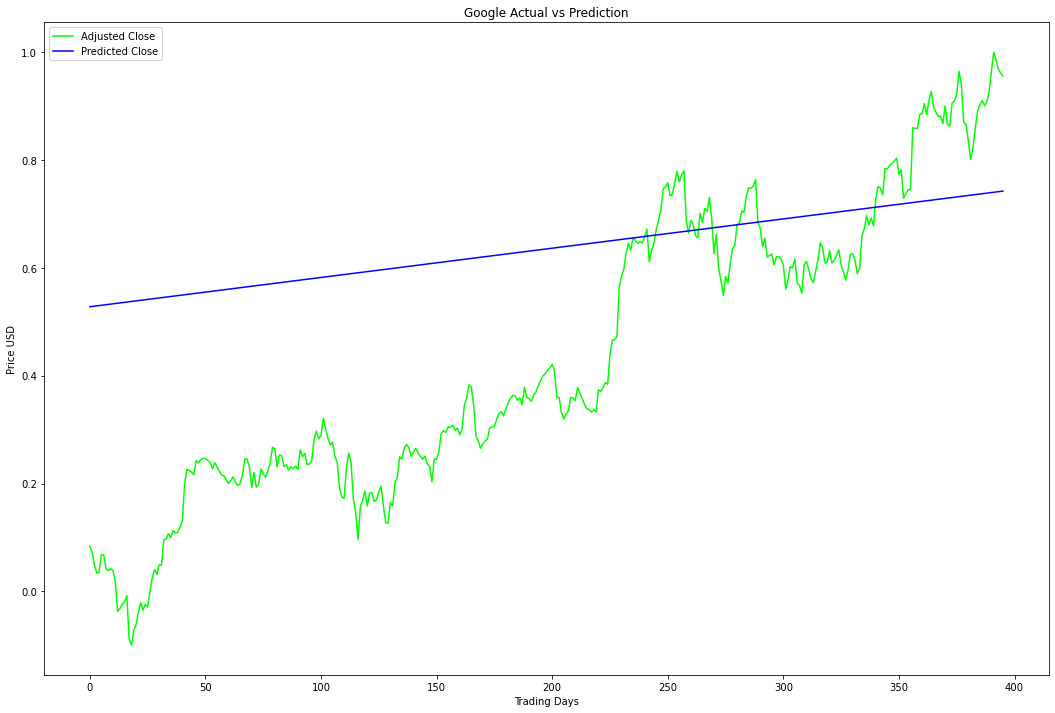

In [47]:
plot_prediction(y_test,predictions,'Google Actual vs Prediction')

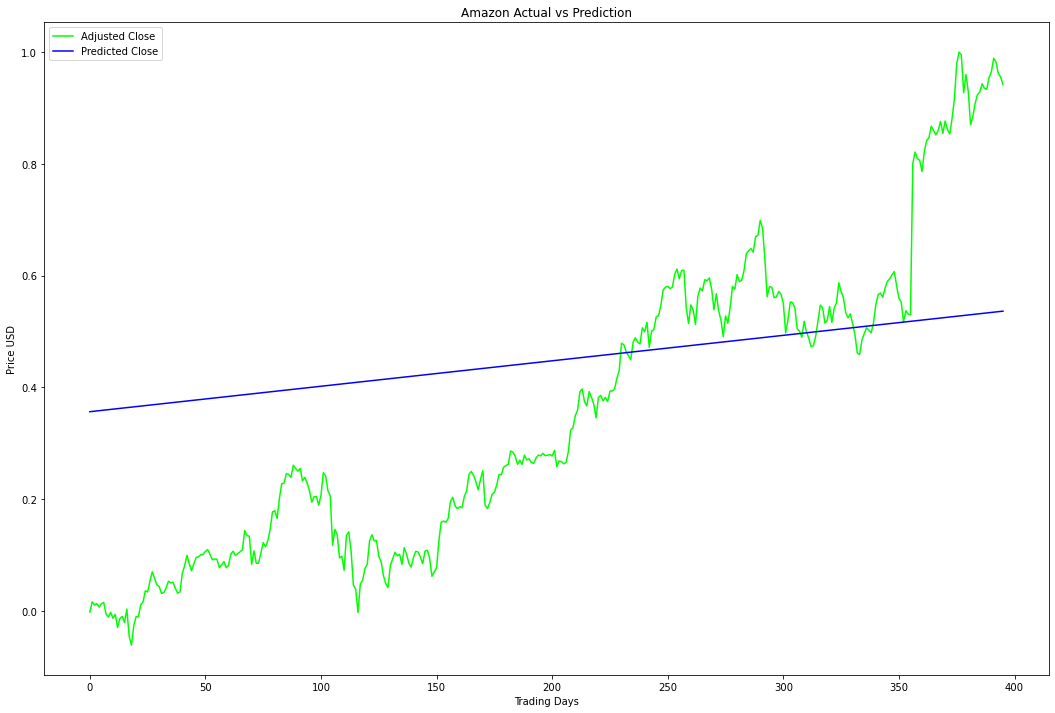

In [49]:
plot_prediction(y_test1,predictions1,'Amazon Actual vs Prediction')

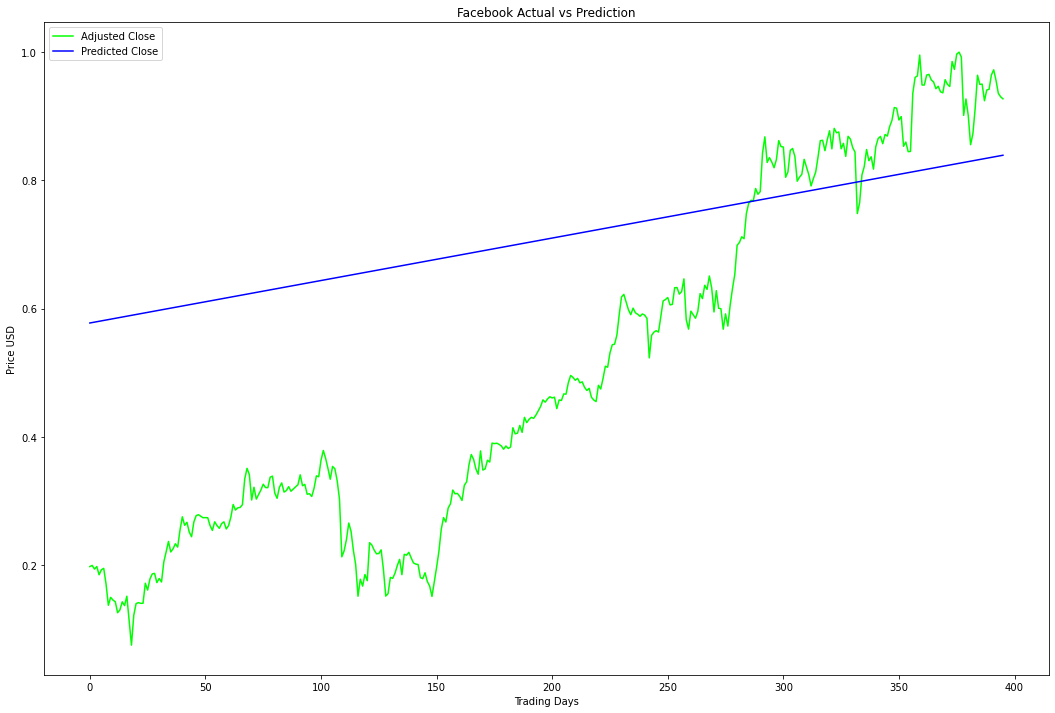

In [50]:
plot_prediction(y_test2,predictions2,'Facebook Actual vs Prediction')

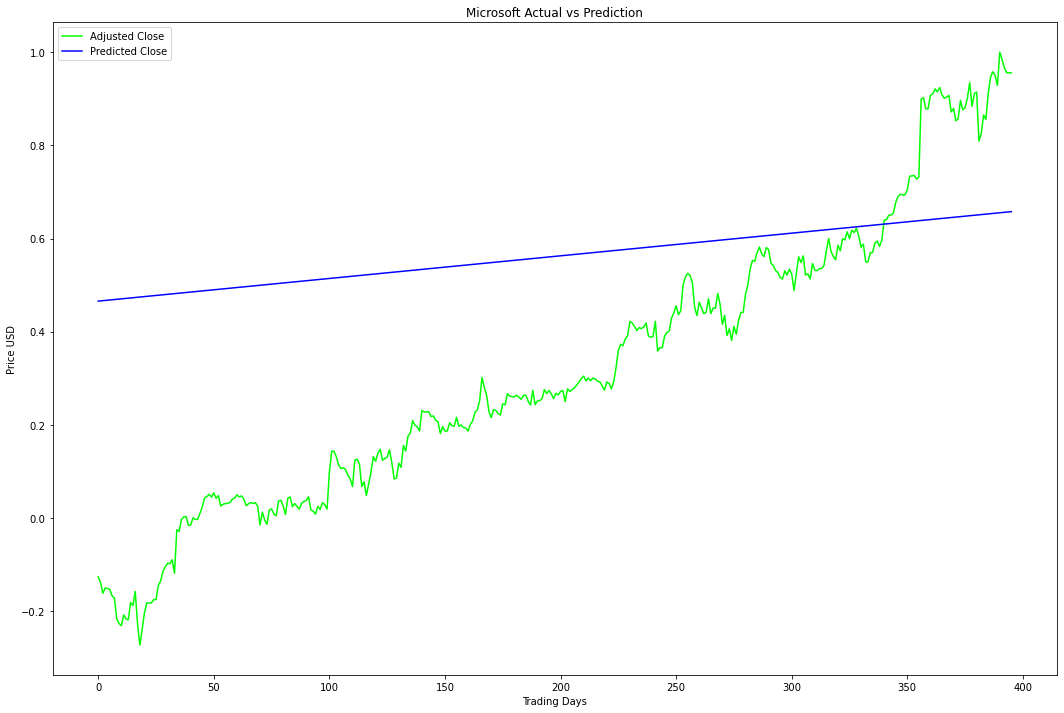

In [51]:
plot_prediction(y_test3,predictions3,'Microsoft Actual vs Prediction')

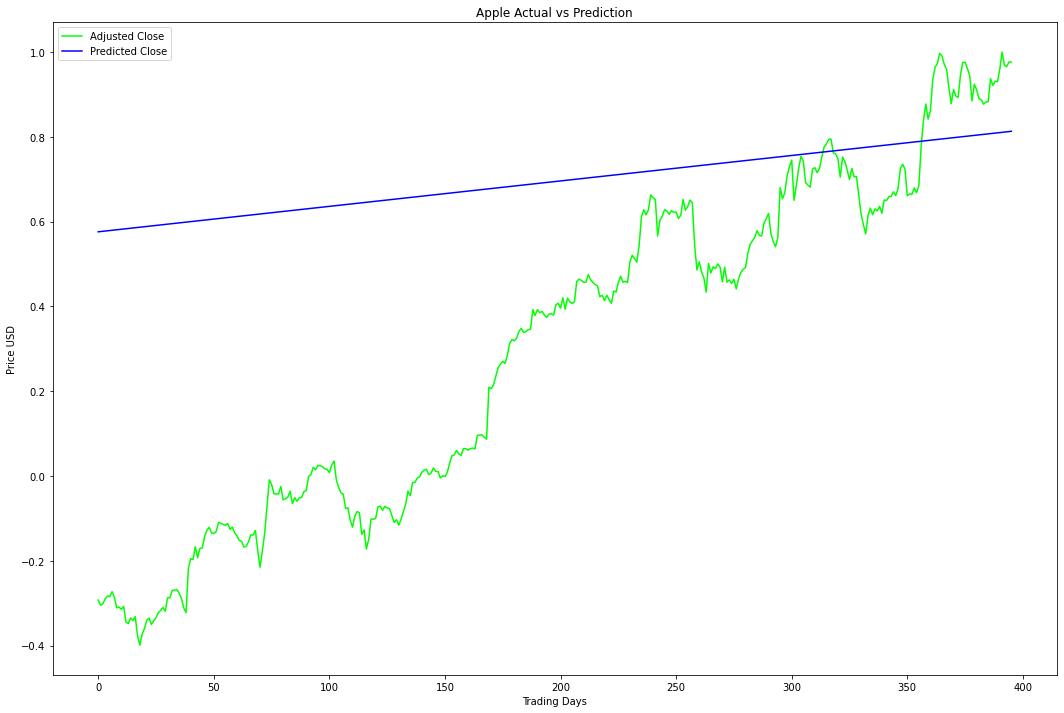

In [52]:
plot_prediction(y_test4,predictions4,'Apple Actual vs Prediction')

## Measure accuracy of the prediction

In [54]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score(Google): %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score(Google): %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score(Google): 0.0431 MSE (0.2076 RMSE)
Test Score(Google): 0.08345727 MSE (0.28888971 RMSE)


In [55]:
trainScore1 = mean_squared_error(X_train1, y_train1)
print('Train Score(Amazon): %.4f MSE (%.4f RMSE)' % (trainScore1, math.sqrt(trainScore1)))

testScore1 = mean_squared_error(predictions1, y_test1)
print('Test Score(Amazon): %.8f MSE (%.8f RMSE)' % (testScore1, math.sqrt(testScore1)))

Train Score(Amazon): 0.1817 MSE (0.4262 RMSE)
Test Score(Amazon): 0.05734113 MSE (0.23946009 RMSE)


In [56]:
trainScore2 = mean_squared_error(X_train2, y_train2)
print('Train Score(Facebook): %.4f MSE (%.4f RMSE)' % (trainScore2, math.sqrt(trainScore2)))

testScore2 = mean_squared_error(predictions2, y_test2)
print('Test Score(Facebook): %.8f MSE (%.8f RMSE)' % (testScore2, math.sqrt(testScore2)))

Train Score(Facebook): 0.0202 MSE (0.1420 RMSE)
Test Score(Facebook): 0.08100539 MSE (0.28461447 RMSE)


In [57]:
trainScore3 = mean_squared_error(X_train3, y_train3)
print('Train Score(Microsoft): %.4f MSE (%.4f RMSE)' % (trainScore3, math.sqrt(trainScore3)))

testScore3 = mean_squared_error(predictions3, y_test3)
print('Test Score(Microsoft): %.8f MSE (%.8f RMSE)' % (testScore3, math.sqrt(testScore3)))

Train Score(Microsoft): 0.0621 MSE (0.2493 RMSE)
Test Score(Microsoft): 0.12117083 MSE (0.34809601 RMSE)


In [58]:
trainScore4 = mean_squared_error(X_train4, y_train4)
print('Train Score(Apple): %.4f MSE (%.4f RMSE)' % (trainScore4, math.sqrt(trainScore4)))

testScore4 = mean_squared_error(predictions4, y_test4)
print('Test Score(Apple): %.8f MSE (%.8f RMSE)' % (testScore4, math.sqrt(testScore4)))

Train Score(Apple): 0.0586 MSE (0.2420 RMSE)
Test Score(Apple): 0.26521289 MSE (0.51498824 RMSE)


## Long-Sort Term Memory Model

## Basic

In [61]:
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time

print("Google")
stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Google


,Open,Close,Volume
0,0.009912,0.006465,0.051330
1,0.005513,0.006035,0.081535
2,0.004877,0.004278,0.122666
3,0.001154,0.000000,0.100956
4,0.000000,0.005020,0.153623


In [62]:
print("Amazon")
stocks1 = pd.read_csv('amazon_preprocessed.csv')
stocks_data1 = stocks1.drop(['Item'], axis =1)

display(stocks_data1.head())

print("Facebook")
stocks2 = pd.read_csv('facebook_preprocessed.csv')
stocks_data2 = stocks2.drop(['Item'], axis =1)

display(stocks_data2.head())

print("Microsoft")
stocks3 = pd.read_csv('Microsoft_preprocessed.csv')
stocks_data3 = stocks3.drop(['Item'], axis =1)

display(stocks_data3.head())

print("Apple")
stocks4 = pd.read_csv('apple_preprocessed.csv')
stocks_data4 = stocks4.drop(['Item'], axis =1)

display(stocks_data4.head())

Amazon


,Open,Close,Volume
0,0.014098,0.014138,0.000000
1,0.013942,0.003629,0.138525
2,0.004713,0.003292,0.116078
3,0.002185,0.000000,0.038226
4,0.000000,0.005985,0.106446


Facebook


,Open,Close,Volume
0,0.021866,0.025167,0.062070
1,0.025168,0.022544,0.075824
2,0.022178,0.019672,0.104489
3,0.015512,0.018797,0.140905
4,0.019998,0.023231,0.151473


Microsoft


,Open,Close,Volume
0,0.011710,0.009935,0.055671
1,0.008906,0.006624,0.100437
2,0.006597,0.008280,0.132647
3,0.003629,0.001490,0.086365
4,0.001649,0.004140,0.146570


Apple


,Open,Close,Volume
0,0.158009,0.153527,0.091770
1,0.156398,0.145036,0.181302
2,0.149881,0.147476,0.289210
3,0.146001,0.140998,0.217941
4,0.146288,0.167738,0.433647


## Split train and test data sets and Unroll train and test data for lstm model

In [70]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data)
X_train = unroll(X_train, 50)
X_test = unroll(X_test, 50)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
print("Google")
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

X_train1, X_test1,y_train1, y_test1 = train_test_split_lstm(stocks_data1, 5)
unroll_length = 50
X_train1 = unroll(X_train1, unroll_length)
X_test1 = unroll(X_test1, unroll_length)
y_train1 = y_train1[-X_train1.shape[0]:]
y_test1 = y_test1[-X_test1.shape[0]:]
print("Amazon")
print("x_train", X_train1.shape)
print("y_train", y_train1.shape)
print("x_test", X_test1.shape)
print("y_test", y_test1.shape)


X_train2, X_test2,y_train2, y_test2 = train_test_split_lstm(stocks_data2, 5)
unroll_length = 50
X_train2 = unroll(X_train2, unroll_length)
X_test2 = unroll(X_test2, unroll_length)
y_train2 = y_train2[-X_train2.shape[0]:]
y_test2 = y_test2[-X_test2.shape[0]:]
print("Facebook")
print("x_train", X_train2.shape)
print("y_train", y_train2.shape)
print("x_test", X_test2.shape)
print("y_test", y_test2.shape)


X_train3, X_test3,y_train3, y_test3 = train_test_split_lstm(stocks_data3, 5)
unroll_length = 50
X_train3 = unroll(X_train3, unroll_length)
X_test3 = unroll(X_test3, unroll_length)
y_train3 = y_train3[-X_train3.shape[0]:]
y_test3 = y_test3[-X_test3.shape[0]:]
print("Microsoft")
print("x_train", X_train3.shape)
print("y_train", y_train3.shape)
print("x_test", X_test3.shape)
print("y_test", y_test3.shape)


X_train4, X_test4,y_train4, y_test4 = train_test_split_lstm(stocks_data4, 5)
unroll_length = 50
X_train4 = unroll(X_train4, unroll_length)
X_test4 = unroll(X_test4, unroll_length)
y_train4 = y_train4[-X_train4.shape[0]:]
y_test4 = y_test4[-X_test4.shape[0]:]
print("Apple")
print("x_train", X_train4.shape)
print("y_train", y_train4.shape)
print("x_test", X_test4.shape)
print("y_test", y_test4.shape)

Google
x_train (708, 50, 3)
y_train (708,)
x_test (450, 50, 3)
y_test (450,)
Amazon
x_train (704, 50, 3)
y_train (704,)
x_test (446, 50, 3)
y_test (446,)
Facebook
x_train (704, 50, 3)
y_train (704,)
x_test (446, 50, 3)
y_test (446,)
Microsoft
x_train (704, 50, 3)
y_train (704,)
x_test (446, 50, 3)
y_test (446,)
Apple
x_train (704, 50, 3)
y_train (704,)
x_test (446, 50, 3)
y_test (446,)


## LSTM Model

In [72]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


In [74]:
# build basic lstm model
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Google) : ', time.time() - start)

compilation time(Google) :  0.004010677337646484


In [75]:
# build basic lstm model
model1 = build_basic_model(input_dim = X_train1.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model1.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Amazon) : ', time.time() - start)

compilation time(Amazon) :  0.005012989044189453


In [76]:
# build basic lstm model
model2 = build_basic_model(input_dim = X_train2.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model2.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Facebook) : ', time.time() - start)

compilation time(Facebook) :  0.005050182342529297


In [77]:
# build basic lstm model
model3 = build_basic_model(input_dim = X_train3.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model3.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Microsoft) : ', time.time() - start)

compilation time(Microsoft) :  0.004010438919067383


In [78]:
# build basic lstm model
model4 = build_basic_model(input_dim = X_train4.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model4.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Apple) : ', time.time() - start)

compilation time(Apple) :  0.004975795745849609


## Train the model

In [81]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)
model1.fit(
    X_train1,
    y_train1,
    epochs=1,
    validation_split=0.05)
model2.fit(
    X_train2,
    y_train2,
    epochs=1,
    validation_split=0.05)


21/21 [==============================] - 1s 35ms/step - loss: 0.0012 - val_loss: 5.0863e-04


In [82]:
model3.fit(
    X_train3,
    y_train3,
    epochs=1,
    validation_split=0.05)
model4.fit(
    X_train4,
    y_train4,
    epochs=1,
    validation_split=0.05)

21/21 [==============================] - 1s 36ms/step - loss: 0.0018 - val_loss: 0.0032


## Make prediction

In [84]:
predictions = model.predict(X_test)
predictions1 = model1.predict(X_test1)
predictions2 = model2.predict(X_test2)
predictions3 = model3.predict(X_test3)
predictions4 = model4.predict(X_test4)

## Plot the results

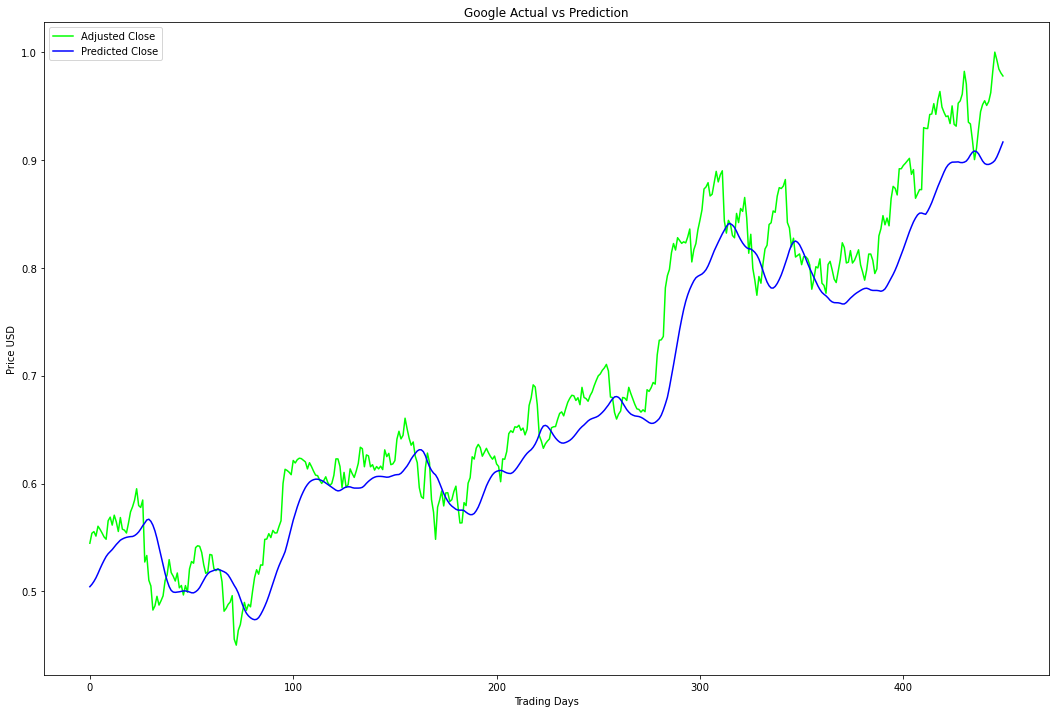

In [85]:
plot_lstm_prediction(y_test,predictions,'Google Actual vs Prediction')

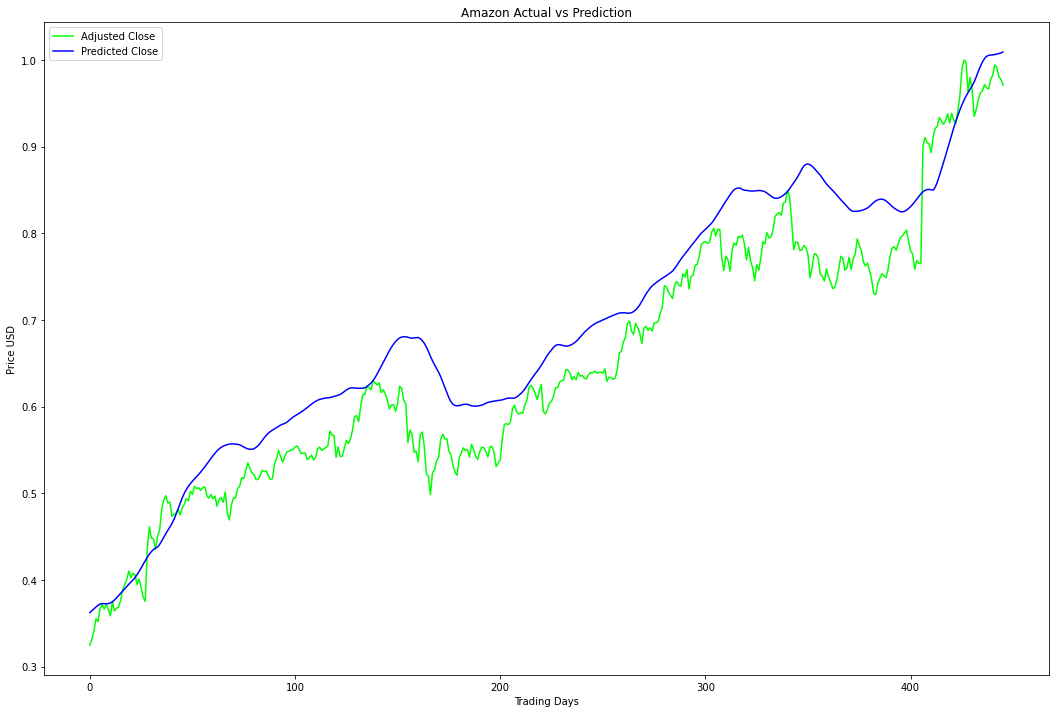

In [86]:
plot_lstm_prediction(y_test1,predictions1,'Amazon Actual vs Prediction')

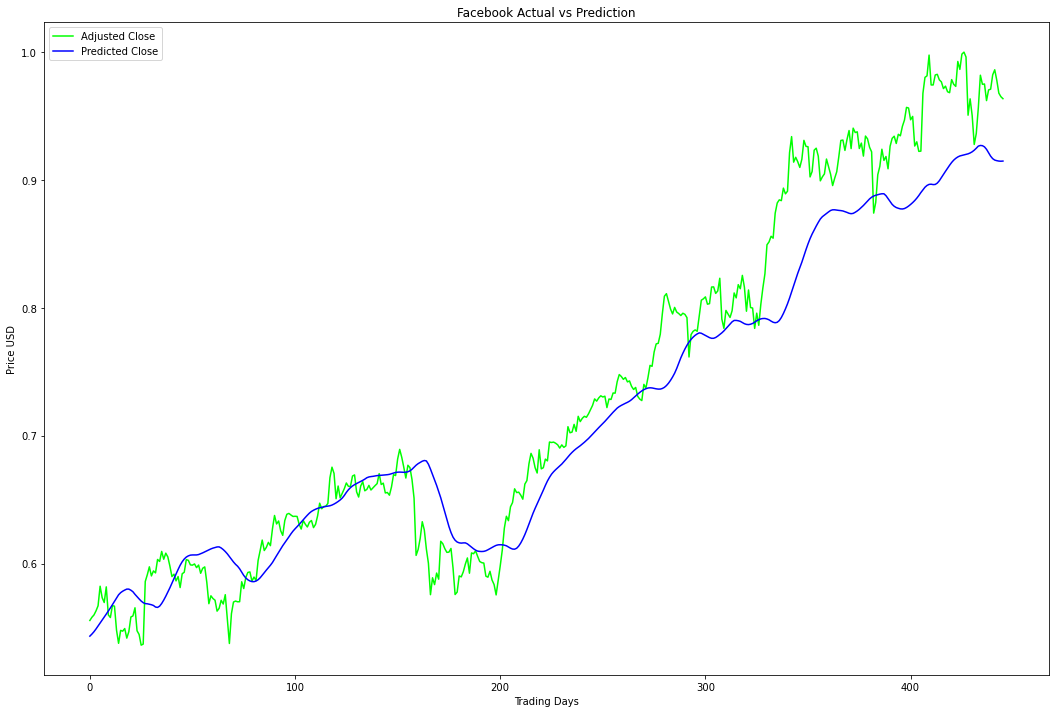

In [87]:
plot_lstm_prediction(y_test2,predictions2,'Facebook Actual vs Prediction')

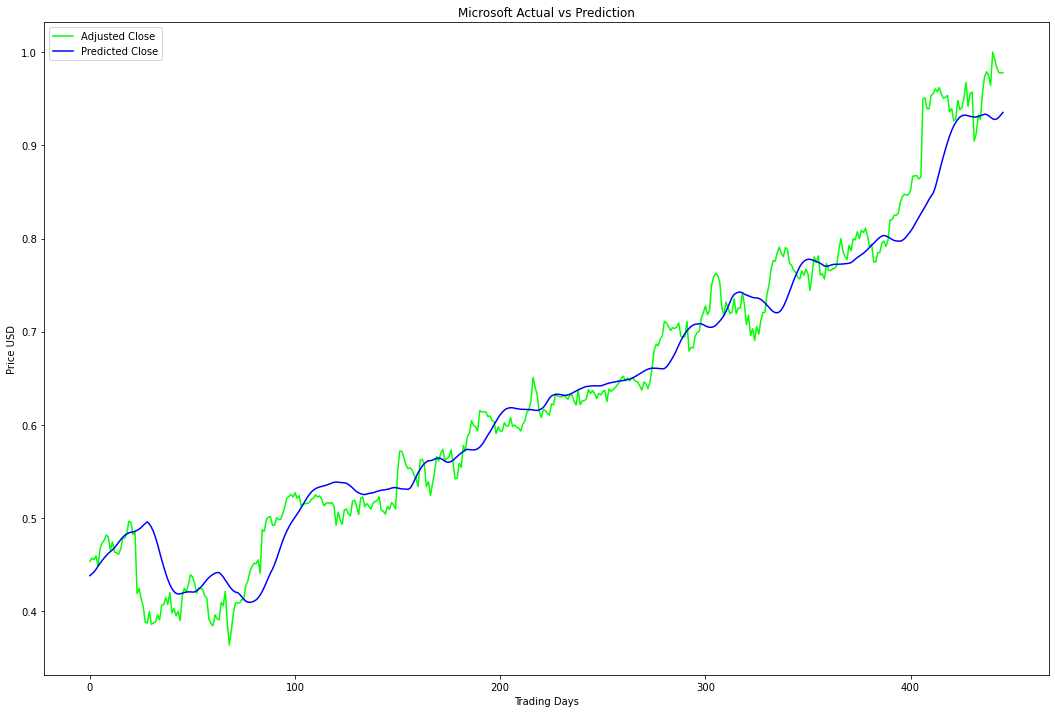

In [88]:
plot_lstm_prediction(y_test3,predictions3,'Microsoft Actual vs Prediction')

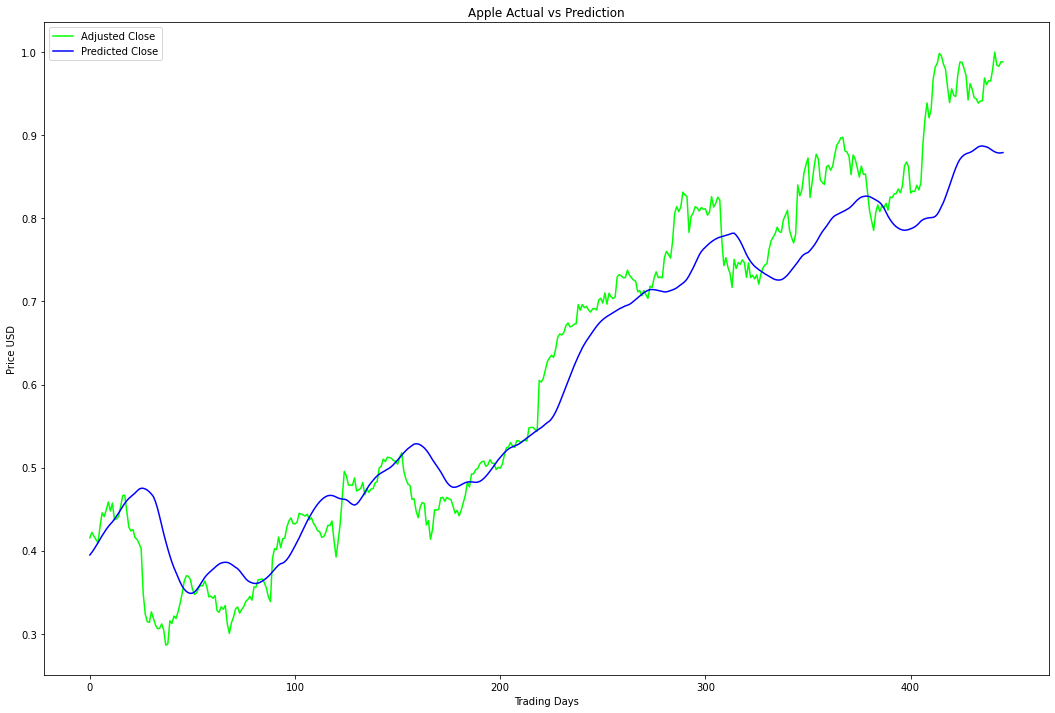

In [89]:
plot_lstm_prediction(y_test4,predictions4,'Apple Actual vs Prediction')

## Test Score

In [99]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score(Google): %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score(Google): %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

trainScore1 = model1.evaluate(X_train1, y_train1, verbose=0)
print('Train Score(Amazon): %.8f MSE (%.8f RMSE)' % (trainScore1, math.sqrt(trainScore1)))

testScore1 = model1.evaluate(X_test1, y_test1, verbose=0)
print('Test Score(Amazon): %.8f MSE (%.8f RMSE)' % (testScore1, math.sqrt(testScore1)))

trainScore2 = model2.evaluate(X_train2, y_train2, verbose=0)
print('Train Score(Facebook): %.8f MSE (%.8f RMSE)' % (trainScore2, math.sqrt(trainScore2)))

testScore2 = model2.evaluate(X_test2, y_test2, verbose=0)
print('Test Score(Facebook): %.8f MSE (%.8f RMSE)' % (testScore2, math.sqrt(testScore2)))

trainScore3 = model3.evaluate(X_train3, y_train3, verbose=0)
print('Train Score(Microsoft): %.8f MSE (%.8f RMSE)' % (trainScore3, math.sqrt(trainScore3)))

testScore3 = model3.evaluate(X_test3, y_test3, verbose=0)
print('Test Score(Microsoft): %.8f MSE (%.8f RMSE)' % (testScore3, math.sqrt(testScore3)))

trainScore4 = model4.evaluate(X_train4, y_train4, verbose=0)
print('Train Score(Apple): %.8f MSE (%.8f RMSE)' % (trainScore4, math.sqrt(trainScore4)))

testScore4 = model4.evaluate(X_test4, y_test4, verbose=0)
print('Test Score(Apple): %.8f MSE (%.8f RMSE)' % (testScore4, math.sqrt(testScore4)))

Train Score(Google): 0.00071208 MSE (0.02668485 RMSE)
Test Score(Google): 0.00169273 MSE (0.04114284 RMSE)
Train Score(Amazon): 0.00076509 MSE (0.02766028 RMSE)
Test Score(Amazon): 0.00312078 MSE (0.05586393 RMSE)
Train Score(Facebook): 0.00084631 MSE (0.02909142 RMSE)
Test Score(Facebook): 0.00156937 MSE (0.03961523 RMSE)
Train Score(Microsoft): 0.00104824 MSE (0.03237649 RMSE)
Test Score(Microsoft): 0.00108414 MSE (0.03292635 RMSE)
Train Score(Apple): 0.00134220 MSE (0.03663598 RMSE)
Test Score(Apple): 0.00347504 MSE (0.05894947 RMSE)


## Improved LSTM

In [105]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Google) : ', time.time() - start)

compilation time(Google) :  0.004970550537109375


In [106]:
model1 = build_improved_model( X_train1.shape[-1],output_dim = unroll_length, return_sequences=True)
start1 = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Amazon) : ', time.time() - start1)


compilation time(Amazon) :  0.01562666893005371


In [107]:
model2 = build_improved_model( X_train2.shape[-1],output_dim = unroll_length, return_sequences=True)
start2 = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model2.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Facebook) : ', time.time() - start2)

compilation time(Facebook) :  0.0


In [108]:

model3 = build_improved_model( X_train3.shape[-1],output_dim = unroll_length, return_sequences=True)
start3 = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model3.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Microsoft) : ', time.time() - start3)


compilation time(Microsoft) :  0.0


In [109]:
model4 = build_improved_model( X_train4.shape[-1],output_dim = unroll_length, return_sequences=True)
start4 = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model4.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time(Apple) : ', time.time() - start4)

compilation time(Apple) :  0.0


## Training

In [110]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 1s - loss: 0.0256 - val_loss: 0.0045
Epoch 2/5
7/7 - 0s - loss: 0.0050 - val_loss: 0.0253
Epoch 3/5
7/7 - 0s - loss: 0.0025 - val_loss: 4.4753e-04
Epoch 4/5
7/7 - 0s - loss: 0.0019 - val_loss: 0.0094
Epoch 5/5
7/7 - 0s - loss: 0.0017 - val_loss: 0.0013


In [111]:
model1.fit(X_train1, 
          y_train1, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 1s - loss: 0.0082 - val_loss: 0.0056
Epoch 2/5
7/7 - 0s - loss: 0.0021 - val_loss: 0.0108
Epoch 3/5
7/7 - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 4/5
7/7 - 0s - loss: 9.2045e-04 - val_loss: 0.0027
Epoch 5/5
7/7 - 0s - loss: 7.9376e-04 - val_loss: 9.3622e-04


In [112]:
model2.fit(X_train2, 
          y_train2, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 1s - loss: 0.0324 - val_loss: 4.0858e-04
Epoch 2/5
7/7 - 0s - loss: 0.0054 - val_loss: 0.0236
Epoch 3/5
7/7 - 0s - loss: 0.0033 - val_loss: 6.8292e-04
Epoch 4/5
7/7 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 5/5
7/7 - 0s - loss: 0.0018 - val_loss: 0.0012


In [113]:
model3.fit(X_train3, 
          y_train3, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 1s - loss: 0.0217 - val_loss: 0.0015
Epoch 2/5
7/7 - 0s - loss: 0.0041 - val_loss: 0.0170
Epoch 3/5
7/7 - 0s - loss: 0.0023 - val_loss: 2.8352e-04
Epoch 4/5
7/7 - 0s - loss: 0.0017 - val_loss: 0.0068
Epoch 5/5
7/7 - 0s - loss: 0.0016 - val_loss: 9.5472e-04


In [114]:
model4.fit(X_train4, 
          y_train4, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 1s - loss: 0.0475 - val_loss: 0.0013
Epoch 2/5
7/7 - 0s - loss: 0.0092 - val_loss: 0.0094
Epoch 3/5
7/7 - 0s - loss: 0.0046 - val_loss: 0.0108
Epoch 4/5
7/7 - 0s - loss: 0.0030 - val_loss: 0.0015
Epoch 5/5
7/7 - 0s - loss: 0.0027 - val_loss: 0.0037


## Make prediction

In [116]:
predictions = model.predict(X_test, batch_size=batch_size)
predictions1 = model1.predict(X_test1, batch_size=batch_size) 
predictions2 = model2.predict(X_test1, batch_size=batch_size)
predictions3 = model3.predict(X_test1, batch_size=batch_size)
predictions4 = model4.predict(X_test1, batch_size=batch_size)

## Plot the results

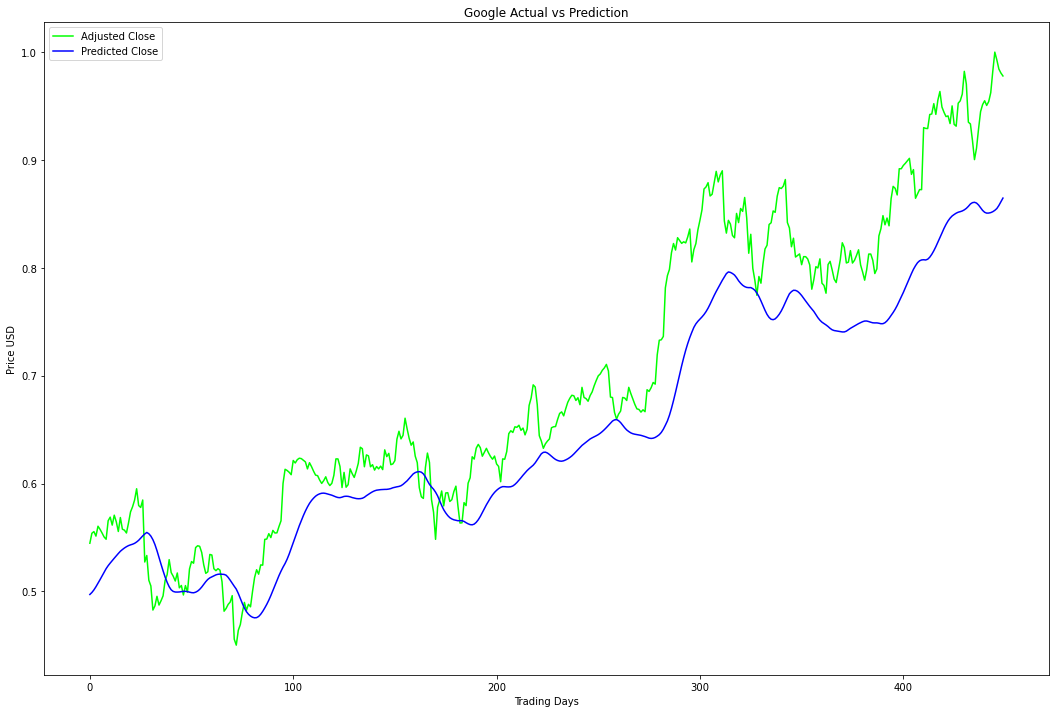

In [117]:
plot_lstm_prediction(y_test,predictions,'Google Actual vs Prediction')

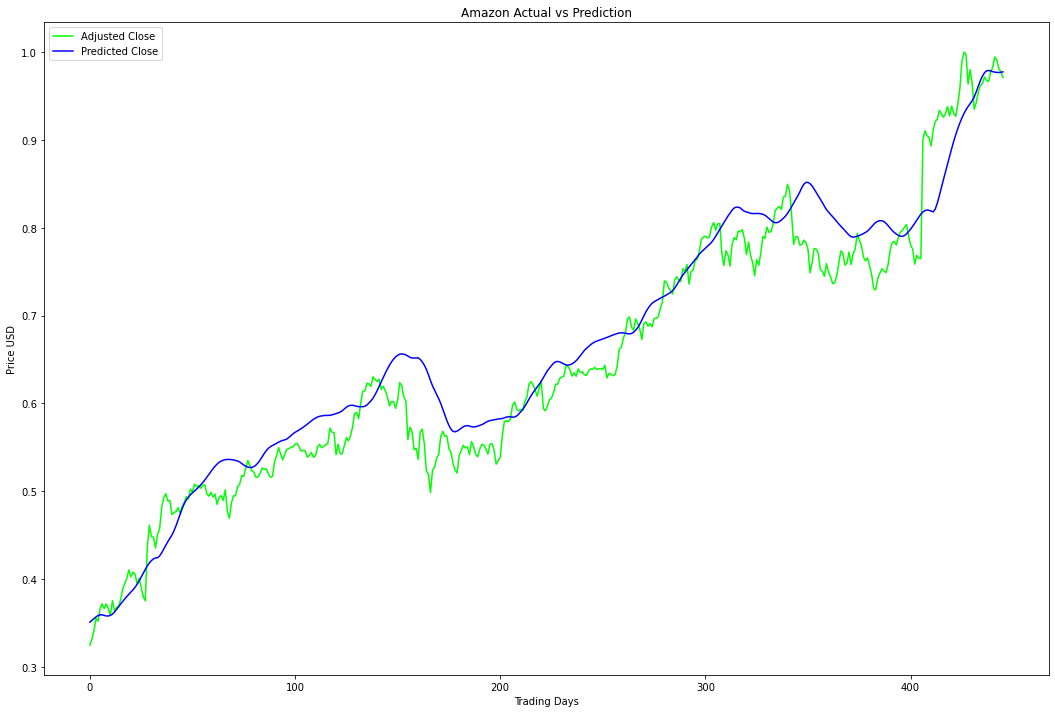

In [118]:
plot_lstm_prediction(y_test1,predictions1,'Amazon Actual vs Prediction')

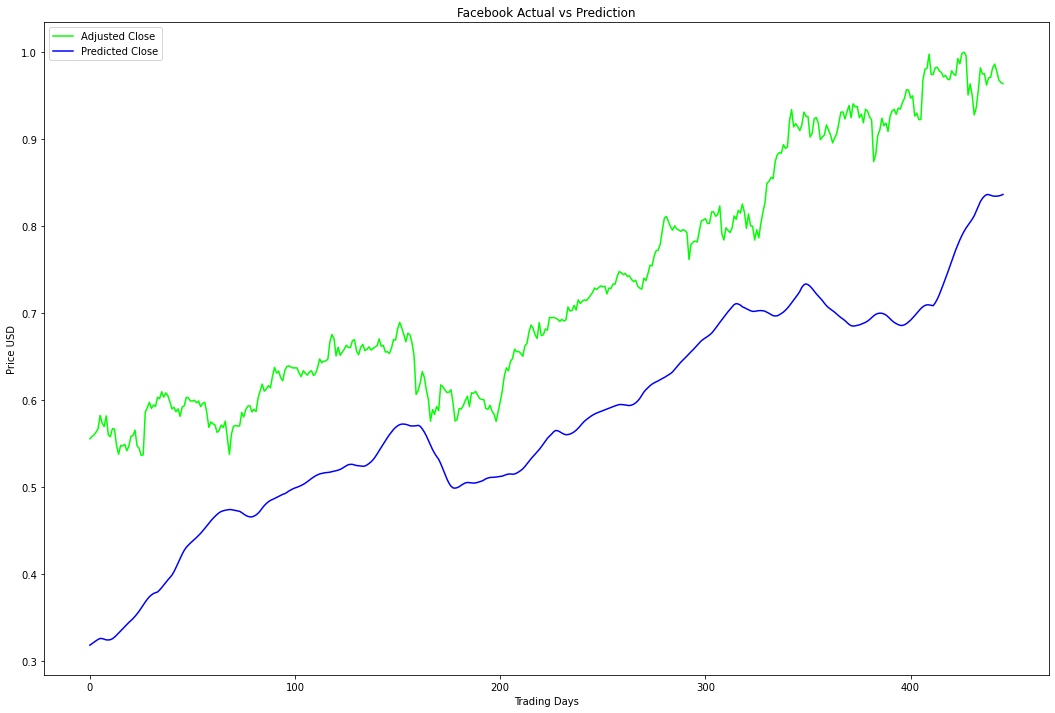

In [120]:
plot_lstm_prediction(y_test2,predictions2,'Facebook Actual vs Prediction')

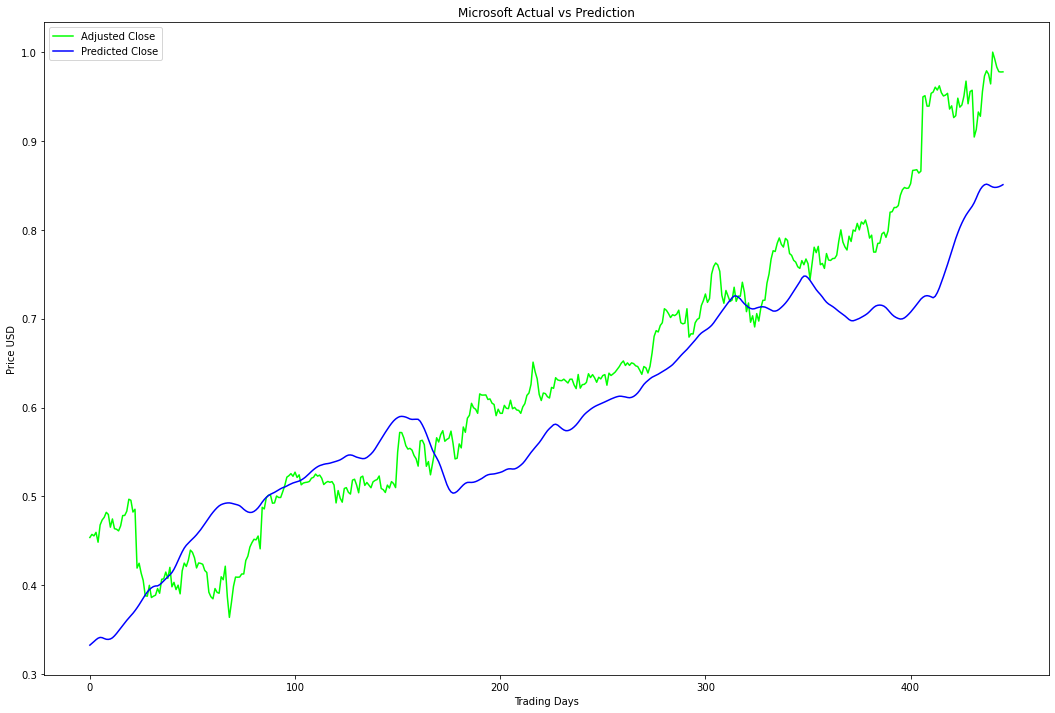

In [121]:
plot_lstm_prediction(y_test3,predictions3,'Microsoft Actual vs Prediction')

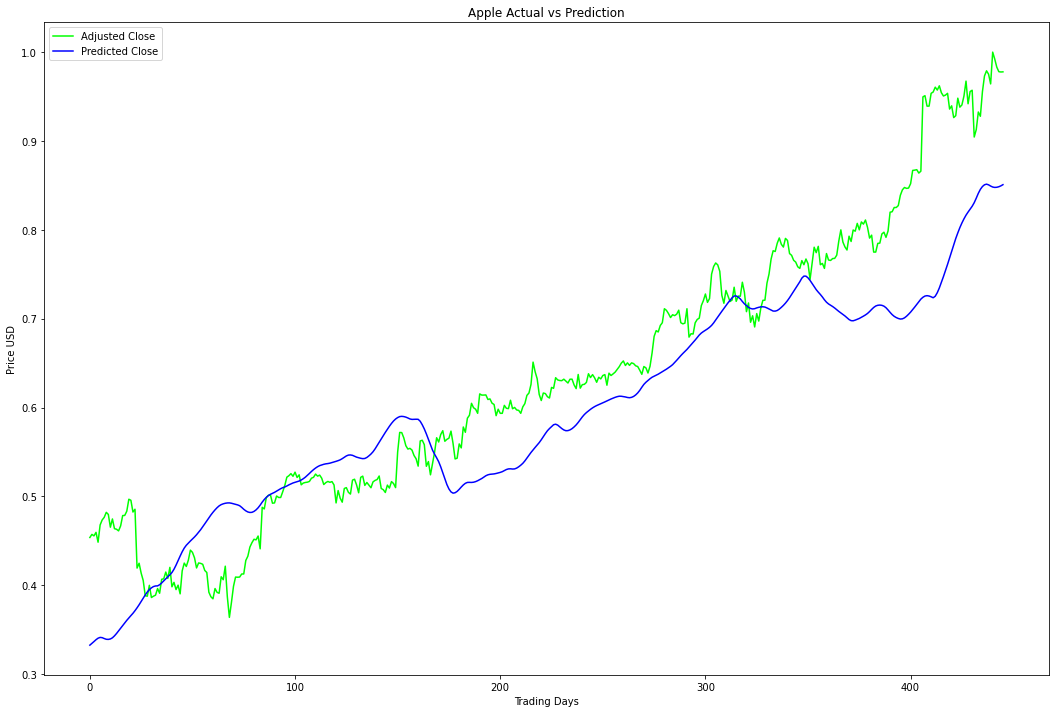

In [122]:
plot_lstm_prediction(y_test3,predictions3,'Apple Actual vs Prediction')

## Test scores

In [123]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score(Google): %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score(Google): %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

trainScore1 = model1.evaluate(X_train1, y_train1, verbose=0)
print('Train Score(Amazon): %.8f MSE (%.8f RMSE)' % (trainScore1, math.sqrt(trainScore1)))

testScore1 = model1.evaluate(X_test1, y_test1, verbose=0)
print('Test Score(Amazon): %.8f MSE (%.8f RMSE)' % (testScore1, math.sqrt(testScore1)))

trainScore2 = model2.evaluate(X_train2, y_train2, verbose=0)
print('Train Score(Facebook): %.8f MSE (%.8f RMSE)' % (trainScore2, math.sqrt(trainScore2)))

testScore2 = model2.evaluate(X_test2, y_test2, verbose=0)
print('Test Score(Facebook): %.8f MSE (%.8f RMSE)' % (testScore2, math.sqrt(testScore2)))

trainScore3 = model3.evaluate(X_train3, y_train3, verbose=0)
print('Train Score(Microsoft): %.8f MSE (%.8f RMSE)' % (trainScore3, math.sqrt(trainScore3)))

testScore3 = model3.evaluate(X_test3, y_test3, verbose=0)
print('Test Score(Microsoft): %.8f MSE (%.8f RMSE)' % (testScore3, math.sqrt(testScore3)))

trainScore4 = model4.evaluate(X_train4, y_train4, verbose=0)
print('Train Score(Apple): %.8f MSE (%.8f RMSE)' % (trainScore4, math.sqrt(trainScore4)))

testScore4 = model4.evaluate(X_test4, y_test4, verbose=0)
print('Test Score(Apple): %.8f MSE (%.8f RMSE)' % (testScore4, math.sqrt(testScore4)))

Train Score(Google): 0.00099414 MSE (0.03153003 RMSE)
Test Score(Google): 0.00387069 MSE (0.06221484 RMSE)
Train Score(Amazon): 0.00063969 MSE (0.02529209 RMSE)
Test Score(Amazon): 0.00149853 MSE (0.03871085 RMSE)
Train Score(Facebook): 0.00075934 MSE (0.02755618 RMSE)
Test Score(Facebook): 0.00655336 MSE (0.08095283 RMSE)
Train Score(Microsoft): 0.00108484 MSE (0.03293692 RMSE)
Test Score(Microsoft): 0.00370871 MSE (0.06089916 RMSE)
Train Score(Apple): 0.00148679 MSE (0.03855887 RMSE)
Test Score(Apple): 0.00221564 MSE (0.04707053 RMSE)


In [124]:
#Calculate the stock price delta in $

range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]
true_delta = testScore*(range[1]-range[0])
print('Google : Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)

range1 = [np.amin(stocks_data1['Close']), np.amax(stocks_data1['Close'])]
true_delta1 = testScore1*(range1[1]-range1[0])
print('Amazon : Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta1)

range2 = [np.amin(stocks_data2['Close']), np.amax(stocks_data2['Close'])]
true_delta2 = testScore2*(range2[1]-range2[0])
print('Facebook : Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta2)

range3 = [np.amin(stocks_data3['Close']), np.amax(stocks_data3['Close'])]
true_delta3 = testScore3*(range3[1]-range3[0])
print('Microsoft : Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta3)

range4 = [np.amin(stocks_data4['Close']), np.amax(stocks_data4['Close'])]
true_delta4 = testScore4*(range4[1]-range4[0])
print('Apple : Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta4)

Google : Delta Price: 0.003871 - RMSE * Adjusted Close Range
Amazon : Delta Price: 0.001499 - RMSE * Adjusted Close Range
Facebook : Delta Price: 0.006553 - RMSE * Adjusted Close Range
Microsoft : Delta Price: 0.003709 - RMSE * Adjusted Close Range
Apple : Delta Price: 0.002216 - RMSE * Adjusted Close Range
